In [69]:
from HopfieldNet import ClassicHopfield

In [70]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

In [71]:
IMG_SHAPE = (64, 64)
IMG_DIR = "imgs/classic_sync"

In [72]:
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        if img is not None:
            img = img.convert('L')
            img = img.resize(IMG_SHAPE)
            img = np.array(img) / 255.0
            img = img.flatten()
            img = np.where(img > 0.5, 1, -1)
            images.append(img.flatten())
    return images

In [73]:
def save_images(images, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(images):
        img = img.reshape(IMG_SHAPE)
        img = (img + 1) / 2 * 255
        img = Image.fromarray(img.astype(np.uint8))
        img.save(os.path.join(folder_path, f"{i + 1}.png"))

In [74]:
def plot_images(images, n_cols=6):
    n_rows = int(np.ceil(len(images) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i].reshape(IMG_SHAPE), cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [75]:
def blacken_half_image(image):
    half = image.shape[0] // 2
    image[half:] = -1
    return image

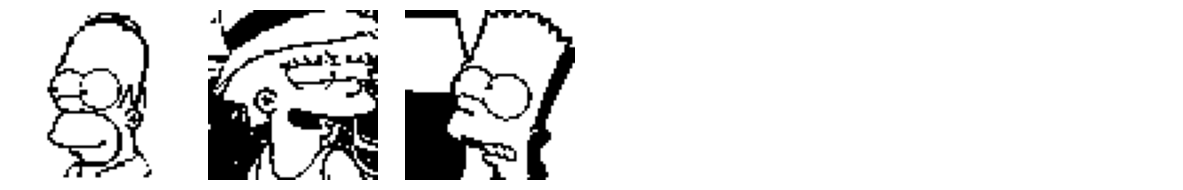

In [76]:
images = load_images_from_folder(IMG_DIR)
plot_images(images)

save_images(images, "imgs")

In [77]:
hopefield_network = ClassicHopfield()
hopefield_network.store_patterns(np.array(images))

Modified image (half blackened):


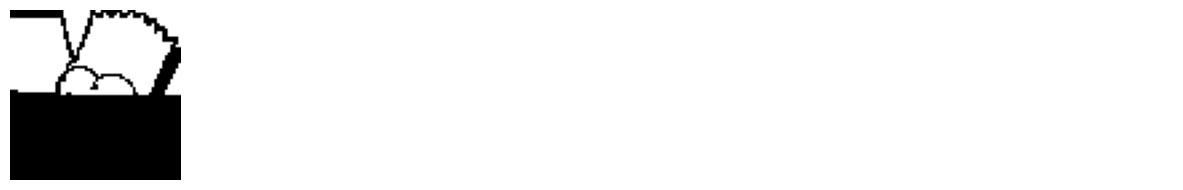

In [78]:
modified_images = blacken_half_image(images[np.random.randint(len(images))].copy())
print("Modified image (half blackened):")
plot_images([modified_images.reshape(IMG_SHAPE)])

In [79]:
recovered_image, state_history, energy_history = hopefield_network.retrieve(modified_images.copy(), mode="sync", max_iter=1000)

print("Recovered image:")
plot_images([recovered_image.reshape(IMG_SHAPE)])

AttributeError: 'ClassicHopfield' object has no attribute '_calculate_update_value'